importing libraries

In [2]:
import pandas as pd
import cv2

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')


data visualisation

In [3]:
df = pd.read_csv(r"D:\machine learning\yolo_object_detection\labels_train.csv\labels_train.csv")
df = shuffle(df)
df.head()

frame  xmin  xmax  ymin  ymax  class_id
13629   1478022262093656256.jpg   131   149   138   153         1
77305   1479500303596160164.jpg   247   273   125   143         1
121486  1479505263936339760.jpg   265   283   138   155         1
99360   1479503105787723216.jpg    77    89   131   163         3
24218   1478732536009531711.jpg   361   371   110   128         5

In [4]:
classes = df.class_id.unique()
print(classes)

[1 3 5 2 4]


In [5]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

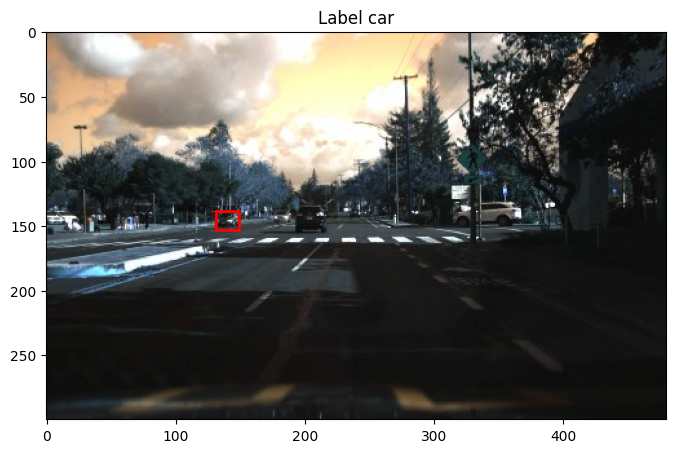

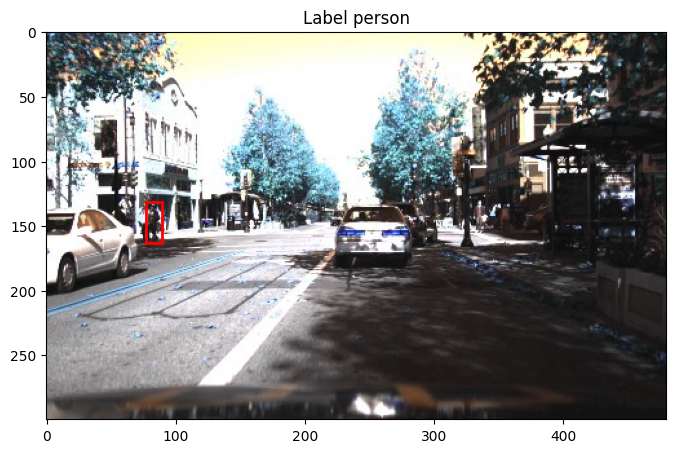

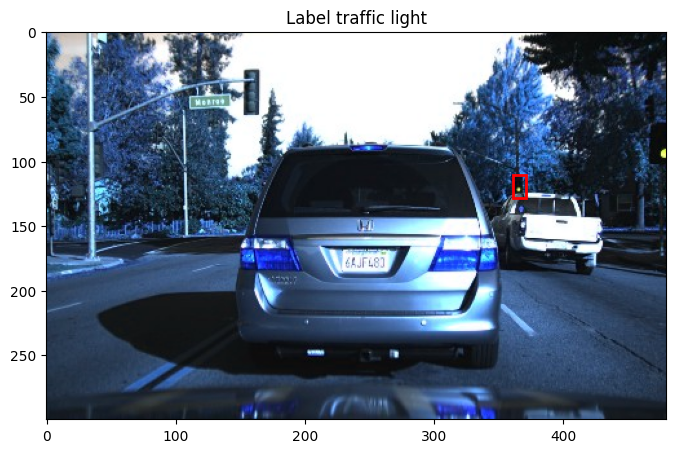

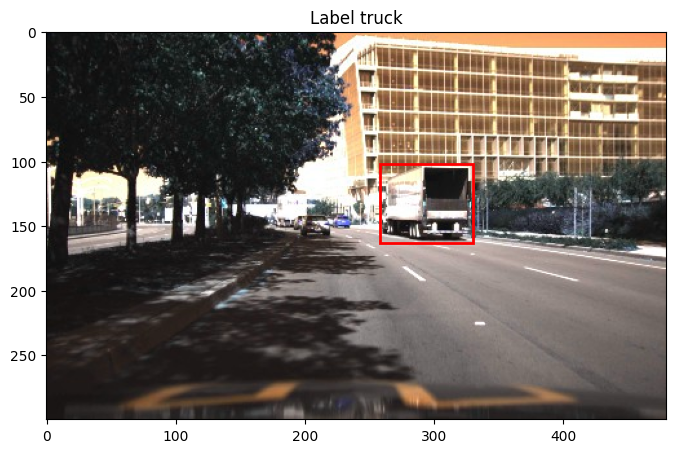

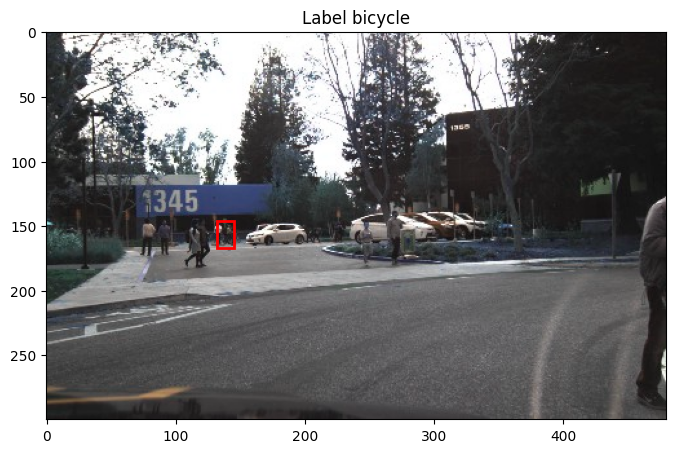

In [6]:
import os

boxes = {}
images = {}

base_path = r'D:\machine learning\yolo_object_detection\images'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    image_path = os.path.join(base_path, first_row['frame'])
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image not loaded: {image_path}")
        continue

    images[class_id] = image
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

for i in classes:
    if i in images:
        xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

        plt.figure(figsize=(8, 10))
        plt.title("Label " + labels[i])
        plt.imshow(images[i])
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='red', fill=False, linewidth=2))

        plt.show()
    else:
        print(f"No image data for class: {i}")

model

In [7]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

In [8]:
model = YOLO("yolov8m.pt")

In [9]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [10]:
results=model.predict(source=r'D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg',
                      save=True, conf=0.2,iou=0.5)


image 1/1 D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg: 416x640 1 person, 2 cars, 616.0ms
Speed: 10.0ms preprocess, 616.0ms inference, 1803.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


In [11]:
result = results[0]
box = result.boxes[0]

In [12]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [13]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 0.0
Coordinates: [433.603271484375, 121.6790542602539, 454.5157470703125, 181.96151733398438]
Probability: 0.7077030539512634


In [14]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: person
Coordinates: [434, 122, 455, 182]
Probability: 0.71
---
Object type: car
Coordinates: [240, 145, 251, 154]
Probability: 0.38
---
Object type: car
Coordinates: [215, 145, 223, 153]
Probability: 0.21
---


In [15]:
results1 = model.predict(source=r'D:\machine learning\yolo_object_detection\images\1478019953180167674.jpg',
                         save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 D:\machine learning\yolo_object_detection\images\1478019953180167674.jpg: 416x640 1 person, 1 car, 535.7ms
Speed: 3.0ms preprocess, 535.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


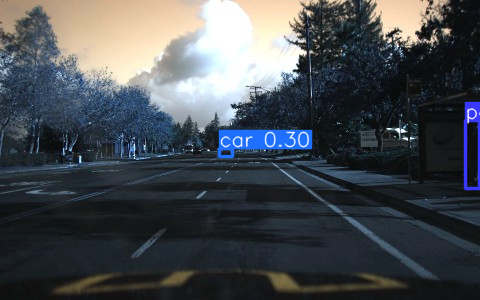

In [16]:
# Plotting results
plot = results1[0].plot()
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg: 416x640 3 cars, 544.4ms
Speed: 2.0ms preprocess, 544.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [413.53045654296875, 127.00181579589844, 461.52423095703125, 148.55072021484375]
Probability: 0.561957836151123
Object type: car
Coordinates: [414, 127, 462, 149]
Probability: 0.56
---
Object type: car
Coordinates: [209, 147, 220, 155]
Probability: 0.23
---
Object type: car
Coordinates: [174, 144, 191, 154]
Probability: 0.21
---

image 1/1 D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg: 416x640 3 cars, 489.7ms
Speed: 4.0ms preprocess, 489.7ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


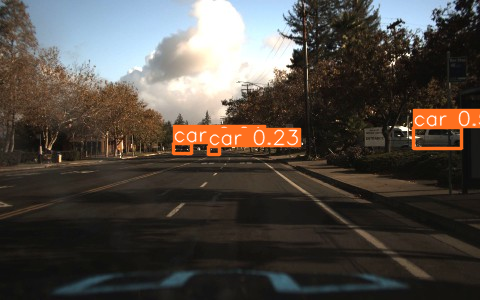

In [17]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg",save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019953689774621.jpg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg: 416x640 3 cars, 536.2ms
Speed: 2.0ms preprocess, 536.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [426.68133544921875, 125.31210327148438, 480.0, 148.13040161132812]
Probability: 0.42830461263656616
Object type: car
Coordinates: [427, 125, 480, 148]
Probability: 0.43
---
Object type: car
Coordinates: [167, 145, 184, 155]
Probability: 0.38
---
Object type: car
Coordinates: [202, 146, 213, 155]
Probability: 0.38
---

image 1/1 D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg: 416x640 3 cars, 524.9ms
Speed: 2.0ms preprocess, 524.9ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


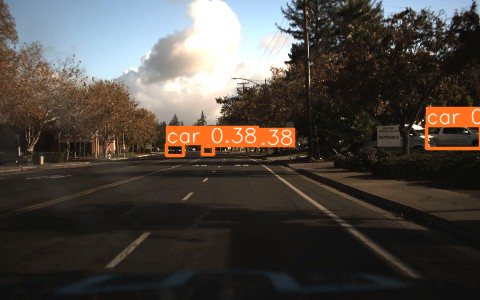

In [18]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019954186238236.jpg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\many_cars.jpeg: 416x640 14 cars, 2 buss, 4 trucks, 561.2ms
Speed: 3.0ms preprocess, 561.2ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [265.3670349121094, 180.9980926513672, 297.4741516113281, 214.33177185058594]
Probability: 0.6432431936264038
Object type: car
Coordinates: [265, 181, 297, 214]
Probability: 0.64
---
Object type: bus
Coordinates: [62, 133, 104, 183]
Probability: 0.64
---
Object type: car
Coordinates: [263, 144, 286, 164]
Probability: 0.55
---
Object type: car
Coordinates: [215, 190, 244, 216]
Probability: 0.54
---
Object type: car
Coordinates: [356, 136, 366, 160]
Probability: 0.51
---
Object type: car
Coordinates: [222, 156, 248, 184]
Probability: 0.49
---
Object type: car
Coordinates: [255, 117, 275, 134]
Probability: 0.44
---
Object type: truck
Coordinates: [351, 91, 366, 113]
Probability: 0.44
---
Object type: car
Coordinates

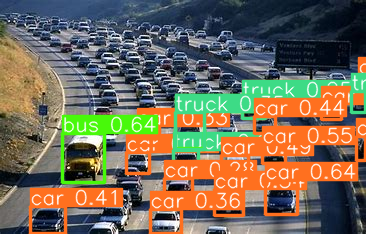

In [19]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\many_cars.jpeg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\many_cars.jpeg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\deer_on_road.jpeg: 448x640 1 car, 1 sheep, 640.8ms
Speed: 5.0ms preprocess, 640.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [213.2239227294922, 32.245582580566406, 284.4015808105469, 81.75514221191406]
Probability: 0.9012024998664856
Object type: car
Coordinates: [213, 32, 284, 82]
Probability: 0.9
---
Object type: sheep
Coordinates: [4, 66, 203, 226]
Probability: 0.22
---

image 1/1 D:\machine learning\yolo_object_detection\deer_on_road.jpeg: 448x640 1 car, 1 sheep, 620.2ms
Speed: 6.0ms preprocess, 620.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


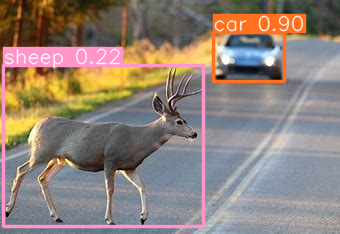

In [20]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\deer_on_road.jpeg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\deer_on_road.jpeg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\pig.jpeg: 480x640 2 cars, 1 cow, 596.7ms
Speed: 2.0ms preprocess, 596.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [0.3055495321750641, 25.513824462890625, 128.15232849121094, 186.88026428222656]
Probability: 0.9451835751533508
Object type: car
Coordinates: [0, 26, 128, 187]
Probability: 0.95
---
Object type: cow
Coordinates: [162, 125, 266, 182]
Probability: 0.9
---
Object type: car
Coordinates: [207, 25, 254, 70]
Probability: 0.75
---

image 1/1 D:\machine learning\yolo_object_detection\pig.jpeg: 480x640 2 cars, 1 cow, 603.7ms
Speed: 5.0ms preprocess, 603.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict2


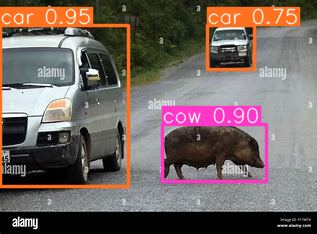

In [21]:
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\pig.jpeg",
                       save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\pig.jpeg",
                          save=True, conf=0.2,iou=0.5)

Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))


image 1/1 D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg: 416x640 1 person, 2 cars, 974.6ms
Speed: 17.5ms preprocess, 974.6ms inference, 21.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2
Object type: 0.0
Coordinates: [433.603271484375, 121.6790542602539, 454.5157470703125, 181.96151733398438]
Probability: 0.7077030539512634
Object type: person
Coordinates: [434, 122, 455, 182]
Probability: 0.71
---
Object type: car
Coordinates: [240, 145, 251, 154]
Probability: 0.38
---
Object type: car
Coordinates: [215, 145, 223, 153]
Probability: 0.21
---
Decided action: Move Right

image 1/1 D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg: 416x640 1 person, 2 cars, 1011.0ms
Speed: 7.0ms preprocess, 1011.0ms inference, 4.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


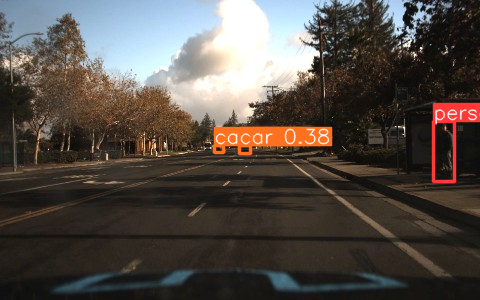

In [39]:
def decide_action(boxes, frame_width):
    # Divide the frame into three sections
    section_width = frame_width / 3

    # Initialize counters for vehicles in each section
    left_count = center_count = right_count = 0

    # Count the vehicles in each section
    for box in boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0].tolist()
        x_center = (xmin + xmax) / 2
        if x_center < section_width:
            left_count += 1
        elif x_center < section_width * 2:
            center_count += 1
        else:
            right_count += 1

    # Decide action based on vehicle counts
    if left_count > right_count and left_count > center_count:
        return "Move Right"
    elif right_count > left_count and right_count > center_count:
        return "Move Left"
    else:
        return "Move Forward"

# Existing code: Use the trained model to detect vehicles
results_=model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg", save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

for result in results_:
    boxes = result.boxes
    masks = result.masks
    probs = result.probs

cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")


frame_width = 1280
action = decide_action(boxes, frame_width)
print("Decided action:", action)

results__ = model.predict(source=r"D:\machine learning\yolo_object_detection\images\1478019952686311006.jpg", save=True, conf=0.2,iou=0.5)
Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [40]:
def decide_action(boxes, frame_width):
    # Divide the frame into three sections
    section_width = frame_width / 3

    # Initialize counters for vehicles in each section
    left_count = center_count = right_count = 0

    # Count the vehicles in each section
    for box in boxes:
        xmin, ymin, xmax, ymax = box.xyxy[0].tolist()
        x_center = (xmin + xmax) / 2
        if x_center < section_width:
            left_count += 1
        elif x_center < section_width * 2:
            center_count += 1
        else:
            right_count += 1

    # Decide action based on vehicle counts
    if left_count > 0 and center_count > 0 and right_count > 0:
        return "Stop"
    elif left_count > right_count and left_count > center_count:
        return "Move Right"
    elif right_count > left_count and right_count > center_count:
        return "Move Left"
    else:
        return "Move Forward"

In [41]:
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print("---")

Object type: car
Coordinates: [215, 145, 223, 153]
Probability: 0.21
---



image 1/1 D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg: 640x608 4 cars, 1416.6ms
Speed: 9.2ms preprocess, 1416.6ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [113.58023071289062, 136.22132873535156, 154.0084991455078, 168.81336975097656]
Probability: 0.8887924551963806
Object type: car
Coordinates: [114, 136, 154, 169]
Probability: 0.89
---
Object type: car
Coordinates: [15, 133, 64, 176]
Probability: 0.87
---
Object type: car
Coordinates: [60, 78, 89, 102]
Probability: 0.76
---
Object type: car
Coordinates: [184, 108, 218, 137]
Probability: 0.38
---

image 1/1 D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg: 640x608 4 cars, 1210.3ms
Speed: 7.0ms preprocess, 1210.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs\detect\predict2


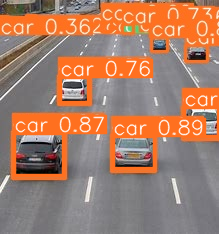

The text file is saved at: D:\machine learning\road_detection\bounding_boxes.txt


In [42]:
results_=model.predict(source=r"D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg", save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

# Open the file in write mode
with open('bounding_boxes.txt', 'w') as f:
    for result in results_:
        boxes = result.boxes
        masks = result.masks
        probs = result.probs

        cords = box.xyxy[0].tolist()
        class_id = box.cls[0].item()
        conf = box.conf[0].item()
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        f.write(f"Object type: {class_id}\n")
        f.write(f"Coordinates: {cords}\n")
        f.write(f"Probability: {conf}\n")

        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            conf = round(box.conf[0].item(), 2)
            print("Object type:", class_id)
            print("Coordinates:", cords)
            print("Probability:", conf)
            print("---")
            f.write(f"Object type: {class_id}\n")
            f.write(f"Coordinates: {cords}\n")
            f.write(f"Probability: {conf}\n")
            f.write("---\n")

results__ = model.predict(source=r"D:\machine learning\road_detection\runs\detect\predict\multiple_cars.jpeg", save=True, conf=0.2,iou=0.5)
Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

import os

# Get the current working directory
cwd = os.getcwd()

# Create the absolute file path
file_path = os.path.join(cwd, 'bounding_boxes.txt')

print(f"The text file is saved at: {file_path}")